In [2]:
%env ALL_PROXY=http://localhost:20171
%env HTTP_PROXY=http://localhost:20171
%env HTTPS_PROXY=http://localhost:20171

env: ALL_PROXY=http://localhost:20171
env: HTTP_PROXY=http://localhost:20171
env: HTTPS_PROXY=http://localhost:20171


In [ ]:
!ping www.youtube.com

In [3]:
!ping youtube.com

^C


In [1]:
import torch
import math
from torch import nn

from PIL import Image
import torchvision.transforms as T
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
import visualize_tools
import numpy as np
import os

In [2]:
model = torch.hub.load("facebookresearch/dinov2", "dinov2_vits14", pretrained=True).to(
    "cuda"
)

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /home/nfs/surgical_depth/.cache/torch/hub/main.zip
/home/nfs/surgical_depth/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/nfs/surgical_depth/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/nfs/surgical_depth/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_pretrain.pth" to /home/nfs/surgical_depth/.cache/torch/hub/checkpoints/dinov2_vits14_pretrain.pth
100%|██████████| 84.2M/84.2M [00:06<00:00, 13.5MB/s]


In [4]:
img = Image.open(
    "/bd_byta6000i0/users/dataset/MedicalImage/CholecSeg8k/processed/images/train/video37_00928frame_934_endo.png"
).convert("RGB")

In [17]:
transform = T.Compose(
    [
        T.Resize((224, 224), T.InterpolationMode.BICUBIC),
        T.CenterCrop((224, 224)),
        T.ToTensor(),
        # T.Normalize(mean=[0.5], std=[0.5]),
        T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ]
)
raw_img = transform(img)[:3].unsqueeze(0).to("cuda")

In [18]:
with torch.no_grad():
    features = model.forward_features(raw_img)

In [19]:
features = features["x_norm_patchtokens"].reshape(1, 16, 16, 384)

In [20]:
from visualize_tools import get_pca_map

In [23]:
with torch.no_grad():
    pca = get_pca_map(features, img_size=(224, 224))


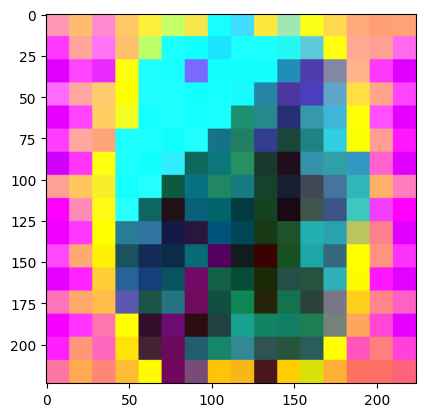

In [24]:
plt.imshow(pca)